In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('citrus data set.csv')
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [4]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

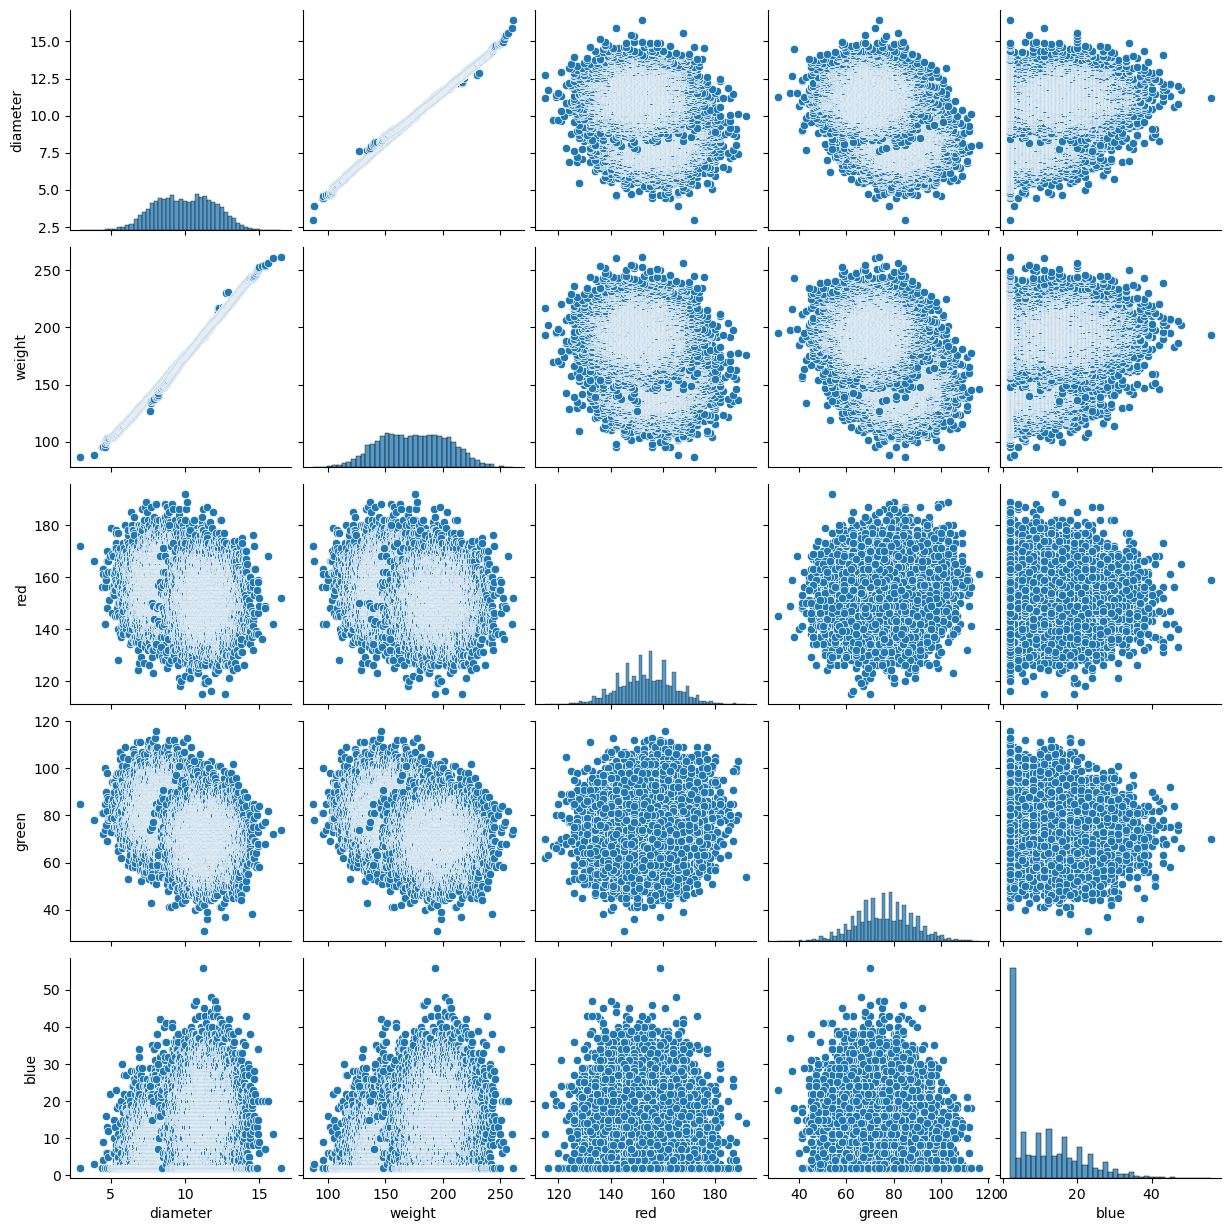

In [8]:
sns.pairplot(df)

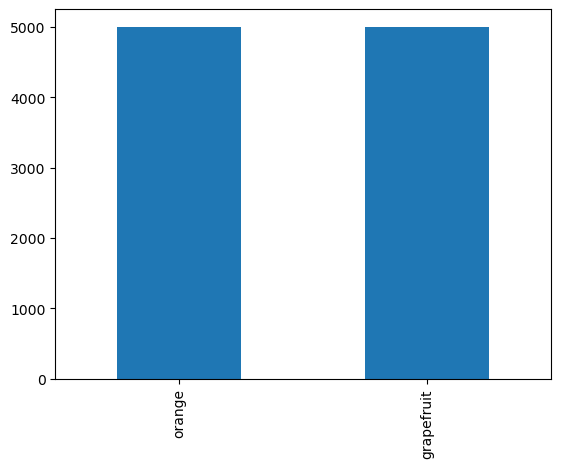

In [10]:
df['name'].value_counts().plot(kind='bar')
plt.show()

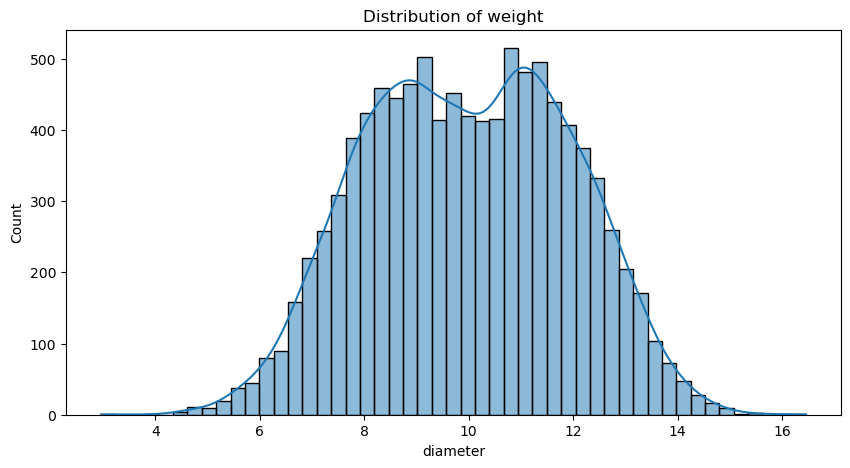

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='diameter',kde=True)
plt.title('Distribution of weight')
plt.show()

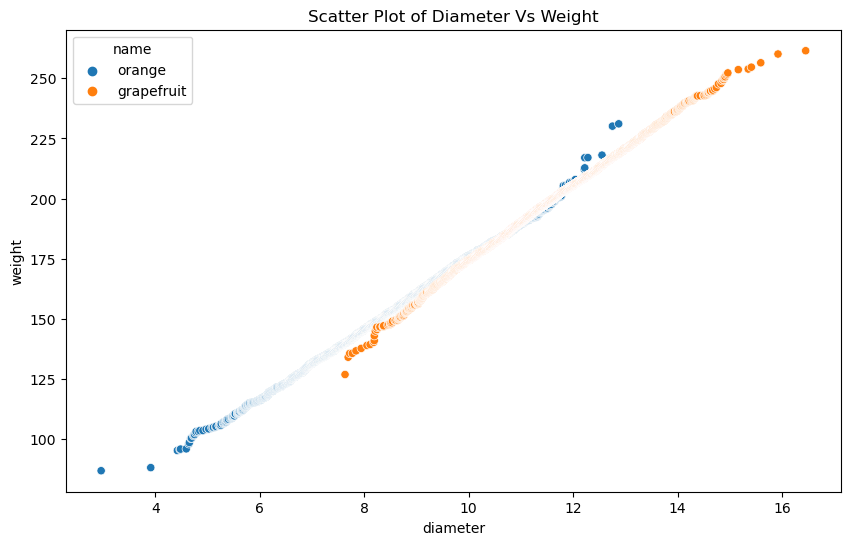

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='diameter',y='weight',hue='name')
plt.title('Scatter Plot of Diameter Vs Weight')
plt.show()

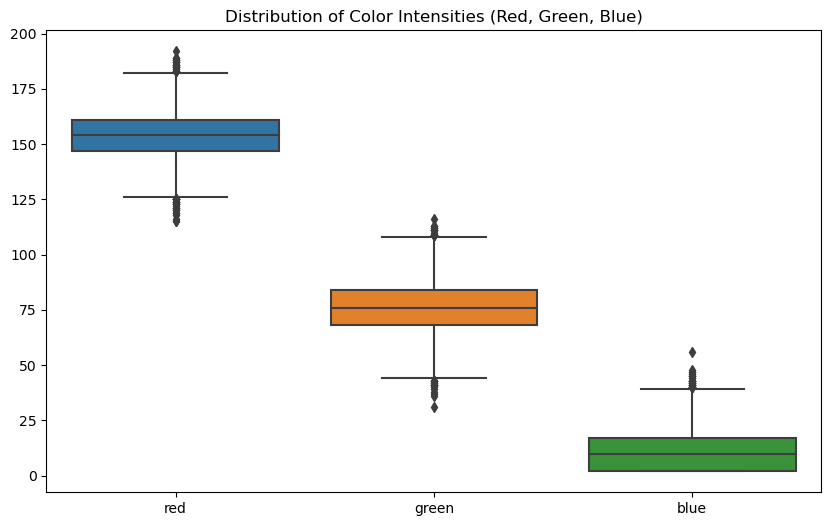

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['red','green','blue']])
plt.title('Distribution of Color Intensities (Red, Green, Blue)')
plt.show()

In [17]:
df['name']=pd.get_dummies(df['name'],dtype=int,drop_first=True)

In [18]:
df

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [22]:
x=df.drop('name',axis=1)
y=df['name']

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

In [28]:
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred=lr.predict(x_test)

In [31]:
x_test[:1]

,diameter,weight,red,green,blue
7653,11.55,198.89,156,59,8


In [32]:
y_pred=lr.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
confusion_matrix(y_test,y_pred)

array([[976,  32],
       [ 62, 930]], dtype=int64)

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1038
           1       0.94      0.97      0.95       962

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

